<a href="https://colab.research.google.com/github/uthiralakshmi/CatsVsDogsClassifier/blob/master/Copy_of_ImageClassifierCNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesCallback
import efficientnet.keras as efn
import os
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
MODEL_FILE = "cats_vs_dogs.h5"

# Data
#Train and validation
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

#test


test_dir = '/content/test'
num_test = len(os.listdir(test_dir+os.path))
print("Total test images:", num_test)


#path = "/home/greg/datasets/cats_and_dogs/"
#training_data_dir = path + "training" # 10 000 * 2
#validation_data_dir = path + "validation" # 2 500 * 2
#test_data_dir = path + "test" # 12 500

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000
Total test images: 2


In [ ]:
# Hyperparams
IMAGE_SIZE = 150
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
epochs = 100
BATCH_SIZE = 128
TEST_SIZE = 10

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [ ]:

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', 
           input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(512, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7f1caa57ac88>>

In [ ]:
# Data augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
# Data preparation
training_generator = training_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
# Training
history = model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    #callbacks=[PlotLossesCallback(), CSVLogger(TRAINING_LOGS_FILE, append=False,separator=";")], 
    verbose=1)
#model.save_weights(MODEL_FILE)

Epoch 1/100
15/15 [==============================] - 156s 10s/step - loss: 0.7022 - accuracy: 0.5064 - val_loss: 0.6902 - val_accuracy: 0.4989
Epoch 2/100
15/15 [==============================] - 157s 10s/step - loss: 0.6904 - accuracy: 0.5192 - val_loss: 0.6882 - val_accuracy: 0.5206
Epoch 3/100
15/15 [==============================] - 155s 10s/step - loss: 0.6866 - accuracy: 0.5694 - val_loss: 0.6862 - val_accuracy: 0.5711
Epoch 4/100
15/15 [==============================] - 154s 10s/step - loss: 0.6843 - accuracy: 0.5577 - val_loss: 0.6774 - val_accuracy: 0.6319
Epoch 5/100
15/15 [==============================] - 157s 10s/step - loss: 0.6718 - accuracy: 0.5677 - val_loss: 0.6634 - val_accuracy: 0.5906
Epoch 6/100
15/15 [==============================] - 154s 10s/step - loss: 0.6594 - accuracy: 0.6201 - val_loss: 0.6552 - val_accuracy: 0.6525
Epoch 7/100
15/15 [==============================] - 157s 10s/step - loss: 0.6385 - accuracy: 0.6479 - val_loss: 0.6559 - val_accuracy: 0.5654

In [ ]:
_, acc = model.evaluate_generator(validation_generator, steps=len(validation_generator.filenames) // BATCH_SIZE, verbose=0)
print('> %.3f' % (acc * 100.0))

> 75.000


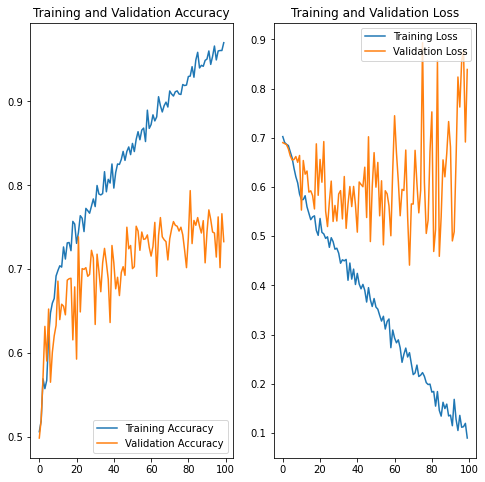

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

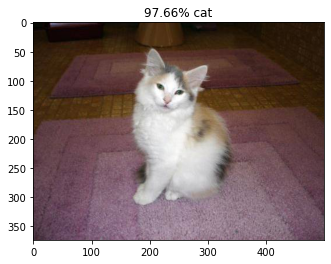

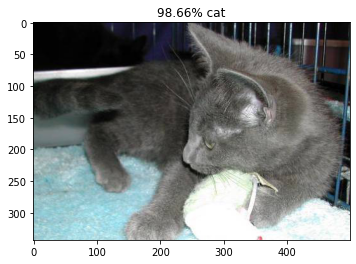

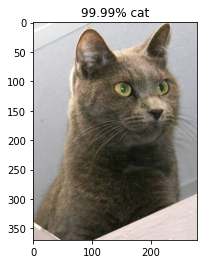

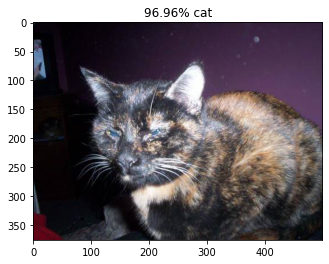

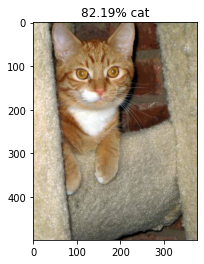

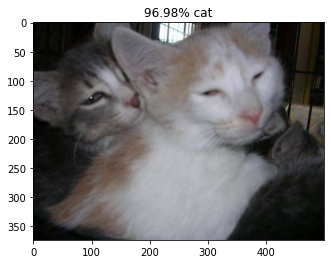

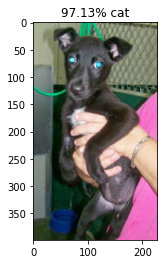

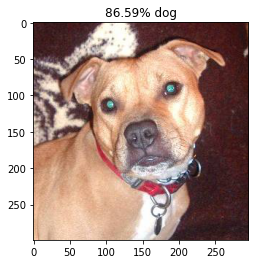

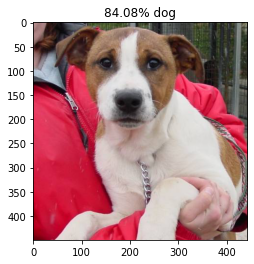

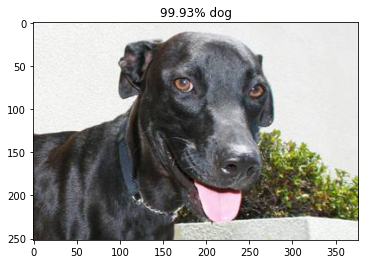

In [ ]:
# Testing
probabilities = model.predict_generator(test_generator, TEST_SIZE)
for index, probability in enumerate(probabilities):
    image_path = test_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.show()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 128)      